# Title of Project: Heart Disease Prediction
`Date: ` 31 Jan 2025 \
`Dataset used: ` [Heart Disease UCI](https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data/data)

<h1 style="font-family: 'poppins'; font-weight: bold; color: Yellow;">👨‍💻Author: Muhammad Usman Khan</h1>


[![GitHub](https://img.shields.io/badge/GitHub-Profile-blue?style=for-the-badge&logo=github)](https://github.com/UsmanK7) 
[![Kaggle](https://img.shields.io/badge/Kaggle-Profile-blue?style=for-the-badge&logo=kaggle)](https://www.kaggle.com/usman707) 
[![LinkedIn](https://img.shields.io/badge/LinkedIn-Profile-blue?style=for-the-badge&logo=linkedin)](https://www.linkedin.com/in/usman-machine-learning-expert/)  


# Meta Data

## Context
This is a multivariate type of dataset, meaning it provides or involves a variety of separate mathematical or statistical variables for multivariate numerical data analysis. It is composed of 14 attributes:

- Age  
- Sex  
- Chest pain type  
- Resting blood pressure  
- Serum cholesterol  
- Fasting blood sugar  
- Resting electrocardiographic results  
- Maximum heart rate achieved  
- Exercise-induced angina  
- Oldpeak — ST depression induced by exercise relative to rest  
- Slope of the peak exercise ST segment  
- Number of major vessels  
- Thalassemia  

This database includes 76 attributes, but all published studies relate to the use of a subset of 14 of them. The Cleveland database is the only one used by ML researchers to date.  

One of the major tasks for this dataset is to predict whether a given patient has heart disease based on the provided attributes. Another experimental task is to diagnose and find insights from the dataset that can help in understanding heart disease better.

## Content

### Column Descriptions:

- **id**: Unique ID for each patient  
- **age**: Age of the patient in years  
- **origin**: Place of study  
- **sex**: Male/Female  
- **cp**: Chest pain type ([typical angina, atypical angina, non-anginal, asymptomatic])  
- **trestbps**: Resting blood pressure (in mm Hg on admission to the hospital)  
- **chol**: Serum cholesterol in mg/dl  
- **fbs**: If fasting blood sugar > 120 mg/dl  
- **restecg**: Resting electrocardiographic results  
  - Values: [normal, ST-T abnormality, left ventricular hypertrophy]  
- **thalach**: Maximum heart rate achieved  
- **exang**: Exercise-induced angina (True/False)  
- **oldpeak**: ST depression induced by exercise relative to rest  
- **slope**: Slope of the peak exercise ST segment  
- **ca**: Number of major vessels (0-3) colored by fluoroscopy  
- **thal**: [normal, fixed defect, reversible defect]  
- **num**: The predicted attribute (presence of heart disease)  

### Acknowledgements

#### Creators:
- **Hungarian Institute of Cardiology, Budapest**: Andras Janosi, M.D.  
- **University Hospital, Zurich, Switzerland**: William Steinbrunn, M.D.  
- **University Hospital, Basel, Switzerland**: Matthias Pfisterer, M.D.  
- **V.A. Medical Center, Long Beach and Cleveland Clinic Foundation**: Robert Detrano, M.D., Ph.D.  

#### Relevant Papers:
- Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989).  
  *International application of a new probability algorithm for the diagnosis of coronary artery disease.*  
  American Journal of Cardiology, 64, 304–310.  

- **David W. Aha & Dennis Kibler**  
  *Instance-based prediction of heart-disease presence with the Cleveland database.*  

- Gennari, J.H., Langley, P., & Fisher, D. (1989).  
  *Models of incremental concept formation.*  
  Artificial Intelligence, 40, 11–61.  

#### Citation Request
The authors of the dataset have requested that any publications resulting from the use of the data include the names of the principal investigators responsible for data collection at each institution:

- **Hungarian Institute of Cardiology, Budapest**: Andras Janosi, M.D.  
- **University Hospital, Zurich, Switzerland**: William Steinbrunn, M.D.  
- **University Hospital, Basel, Switzerland**: Matthias Pfisterer, M.D.  
- **V.A. Medical Center, Long Beach and Cleveland Clinic Foundation**: Robert Detrano, M.D., Ph.D.  


## Aims and Objectives:

### Import libraries
Let's start the project by import the necessary libraries required for data manipulation, visualization, and machine learning.


In [39]:
# import libraries

# 1. to handle the data
import pandas as pd
import numpy as np

# to visualize the dataset
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# To preprocess the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer
# import iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
#for classification tasks
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from xgboost import XGBClassifier
#metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error, r2_score

# ignore warnings   
import warnings
warnings.filterwarnings('ignore')

### Load the Dataset
In this section, we will load the heart disease dataset into a pandas DataFrame for further analysis and processing.

In [40]:
# load the data from csv file placed locally in our pc
df = pd.read_csv('heart_disease_uci.csv')

# print the first 5 rows of the dataframe
df.head()

id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal    0

## Exploratory Data Analysis (Eda)
Here we will explore each column

In [41]:
# exploring the datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [42]:
# data shpae
df.shape

(920, 16)

In [43]:
# id column
df['id'].min(), df['id'].max()

(1, 920)

In [44]:
# age column
df['age'].min(), df['age'].max()

(28, 77)

<Axes: xlabel='age', ylabel='Count'>

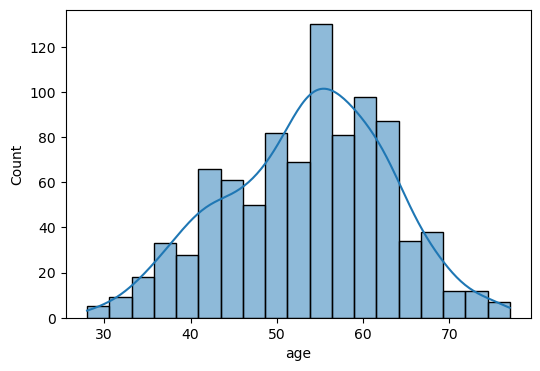

In [45]:
# make a histogram between age and sex
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='age', kde=True)

Mean: 53.51086956521739
Median: 54.0
Mode: 54


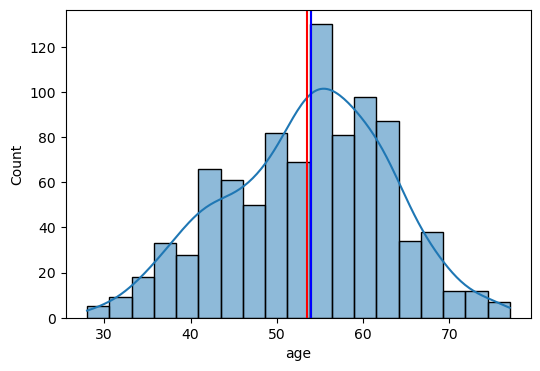

In [46]:
# plot the mean, median and mode of age column 
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='age', kde=True)
plt.axvline(df['age'].mean(), color='red', label='Mean')
plt.axvline(df['age'].median(), color='green', label='Median')
plt.axvline(df['age'].mode()[0], color='blue', label='Mode')

# print the value of mean, median and mode of age column
print('Mean:', df['age'].mean())
print('Median:', df['age'].median())
print('Mode:', df['age'].mode()[0])

In [47]:
# plot the histogram of age column using plotly and coloring it by sex column
fig = px.histogram(data_frame=df, x='age',color='sex')
fig.show()

In [48]:
# find the number of unique values in sex column
df['sex'].value_counts()

sex
Male      726
Female    194
Name: count, dtype: int64

In [49]:
# calculate the percentages of male and females
male_count = 726
female_count = 194
total_count  = male_count + female_count

# calculate the percentage
male_percentage = (male_count / total_count) * 100
female_percentage = (female_count / total_count) * 100

# print the results
print(f"Male percentage in the dataset: {male_percentage:.2f}%")
print(f"Female percentage in the dataset: {female_percentage:.2f}%")

# difference
difference_percentage = ((male_count - female_count)/female_count ) * 100
print(f"Difference in percentage: {difference_percentage:.2f}%")

Male percentage in the dataset: 78.91%
Female percentage in the dataset: 21.09%
Difference in percentage: 274.23%


In [50]:
# find the value count of age column by grouping by sex column
df.groupby('sex')['age'].value_counts() 

sex     age
Female  54     15
        51     11
        62     10
        43      9
        48      9
               ..
Male    77      2
        28      1
        31      1
        33      1
        76      1
Name: count, Length: 91, dtype: int64

In [51]:
# lets deal with dataset column
# find the unique values in dataset column
df['dataset'].unique()  

array(['Cleveland', 'Hungary', 'Switzerland', 'VA Long Beach'],
      dtype=object)

In [52]:
# find unique values in the dataset column
df['dataset'].value_counts()

dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64

sex     dataset      
Female  Cleveland         97
        Hungary           81
        Switzerland       10
        VA Long Beach      6
Male    Hungary          212
        Cleveland        207
        VA Long Beach    194
        Switzerland      113
Name: count, dtype: int64

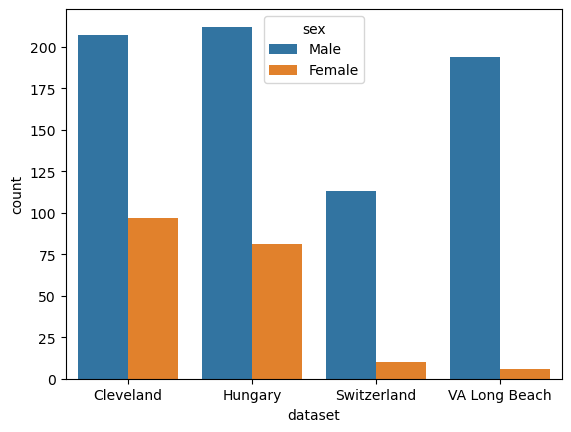

In [53]:
# plot the countplot of dataset column
sns.countplot(data=df, x='dataset', hue='sex')

# print the dataset column grouped by sex
df.groupby('sex')['dataset'].value_counts() 

In [54]:
# make a plot of age column using plotly and coloring this by dataset column
fig = px.histogram(data_frame=df, x='age', color='dataset')
fig.show()

# print the mean median and mode of age column grouped by dataset
print('Mean:', df.groupby('dataset')['age'].mean())
print("________________________________________________")
print('Median:', df.groupby('dataset')['age'].median())
print("________________________________________________")
print('Mode:', df.groupby('dataset')['age'].apply(lambda x: x.mode()[0]))

Mean: dataset
Cleveland        54.351974
Hungary          47.894198
Switzerland      55.317073
VA Long Beach    59.350000
Name: age, dtype: float64
________________________________________________
Median: dataset
Cleveland        55.5
Hungary          49.0
Switzerland      56.0
VA Long Beach    60.0
Name: age, dtype: float64
________________________________________________
Mode: dataset
Cleveland        58
Hungary          54
Switzerland      61
VA Long Beach    62
Name: age, dtype: int64


In [55]:
# Let's sumarize the age column
df['age'].describe()

count    920.000000
mean      53.510870
std        9.424685
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: age, dtype: float64

In [56]:
# value count of cp column
df['cp'].value_counts()

cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64

<Axes: xlabel='cp', ylabel='count'>

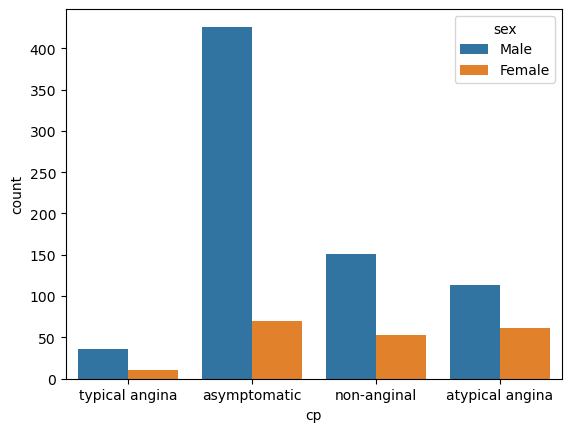

In [57]:
# countplot of cp column grouped by sex column
sns.countplot(data=df, x='cp', hue='sex')

<Axes: xlabel='cp', ylabel='count'>

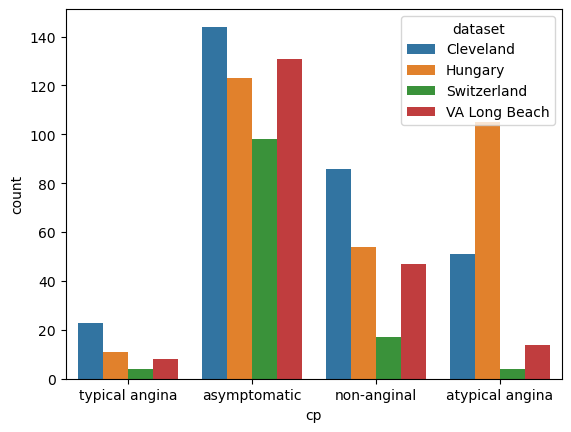

In [58]:
# countplot of cp column grouped by dataset column
sns.countplot(data=df, x='cp', hue='dataset')

In [59]:
# draw the plot of age column using plotly and coloring it by cp column
fig = px.histogram(data_frame=df, x='age', color='cp')
fig.show()

#### Let's explore the trestbps (resting blood pressure) column:
The normal resting blood pressure is 120/80 mm Hg.
- **Low Resting Blood Pressure (Hypotension)**: 
    - **Symptoms**: Dizziness, fainting, blurred vision, nausea, fatigue, lack of concentration.
    - **Potential Causes**: Dehydration, heart problems, endocrine problems, severe infection (septicemia), blood loss, lack of nutrients in your diet.
    - **Risks**: Severe hypotension can deprive your body of enough oxygen to carry out its functions, leading to damage to your heart and brain.

- **High Resting Blood Pressure (Hypertension)**:
    - **Symptoms**: Often asymptomatic, but can include headaches, shortness of breath, nosebleeds, flushing, dizziness, chest pain, visual changes, blood in urine.
    - **Potential Causes**: Stress, high salt intake, obesity, lack of physical activity, chronic kidney disease, adrenal and thyroid disorders, certain medications.
    - **Risks**: Persistent hypertension can lead to serious health problems, including heart disease, stroke, kidney damage, and vision loss.


In [60]:
# find the value counts of trestbps column
df['trestbps'].describe()

count    861.000000
mean     132.132404
std       19.066070
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

<Axes: xlabel='trestbps', ylabel='Count'>

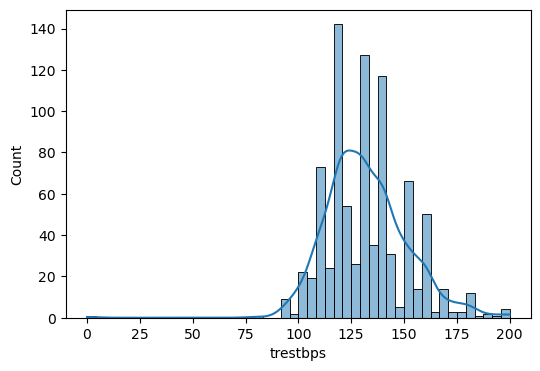

In [61]:
# create a histplot of trestbps column
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='trestbps', kde=True)

### <span style="color:yellow; font-size:60px;font-weight:700">Dealing with missing values</span>


### Missing values imputation function using ML:

1. find the columns with missing values and store in an object
2. find the columns based on data type
   1. numeric
   2. Categoricals
   3. Boolean
3. Define the function to impute missing values
4. apply the function to our dataset with missing values
5. check the missing values after imputation

In [62]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)
missing_data_cols = df.isnull().sum()[df.isnull().sum() > 0].index.tolist()
missing_data_cols

['trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalch',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [63]:
categorical_cols = ['thal', 'ca', 'slope', 'exang', 'restecg','fbs', 'cp', 'sex', 'num']
bool_cols = ['fbs', 'exang']
numeric_cols = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']

In [64]:
categorical_cols = ['thal', 'ca', 'slope', 'exang', 'restecg','fbs', 'cp', 'sex', 'num']
bool_cols = ['fbs', 'exang']
numeric_cols = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']

In [65]:
# define the function to impute the missing values in thal column

def impute_categorical_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    if passed_col in bool_cols:
        y = label_encoder.fit_transform(y)
        
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_classifier = RandomForestClassifier()

    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)

    acc_score = accuracy_score(y_test, y_pred)

    print("The feature '"+ passed_col+ "' has been imputed with", round((acc_score * 100), 2), "accuracy\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_classifier.predict(X)
        if passed_col in bool_cols:
            df_null[passed_col] = df_null[passed_col].map({0: False, 1: True})
        else:
            pass
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

def impute_continuous_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])
    
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_regressor = RandomForestRegressor()

    rf_regressor.fit(X_train, y_train)

    y_pred = rf_regressor.predict(X_test)

    print("MAE =", mean_absolute_error(y_test, y_pred), "\n")
    # print("RMSE =", mean_squared_error(y_test, y_pred, squared=False), "\n")
    print("R2 =", r2_score(y_test, y_pred), "\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_regressor.predict(X)
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]


In [66]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)

ca          611
thal        486
slope       309
fbs          90
oldpeak      62
trestbps     59
thalch       55
exang        55
chol         30
restecg       2
dtype: int64

In [67]:
# remove warning
import warnings
warnings.filterwarnings('ignore')

# impute missing values using our functions
for col in missing_data_cols:
    print("Missing Values", col, ":", str(round((df[col].isnull().sum() / len(df)) * 100, 2))+"%")
    if col in categorical_cols:
        df[col] = impute_categorical_missing_data(col)
    elif col in numeric_cols:
        df[col] = impute_continuous_missing_data(col)
    else:
        pass

Missing Values trestbps : 6.41%
MAE = 13.284046242774565 

R2 = 0.06203946722818188 

Missing Values chol : 3.26%
MAE = 44.52353932584269 

R2 = 0.6816550560487356 

Missing Values fbs : 9.78%
The feature 'fbs' has been imputed with 80.12 accuracy

Missing Values restecg : 0.22%
The feature 'restecg' has been imputed with 63.04 accuracy

Missing Values thalch : 5.98%
MAE = 16.739710982658963 

R2 = 0.3030561795118879 

Missing Values exang : 5.98%
The feature 'exang' has been imputed with 79.77 accuracy

Missing Values oldpeak : 6.74%
MAE = 0.5621395348837209 

R2 = 0.40094275281320424 

Missing Values slope : 33.59%
The feature 'slope' has been imputed with 66.67 accuracy

Missing Values ca : 66.41%
The feature 'ca' has been imputed with 66.13 accuracy

Missing Values thal : 52.83%
The feature 'thal' has been imputed with 72.41 accuracy



In [68]:
df.isnull().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

### <span style="color:yellow; font-size:60px;font-weight:700">Dealing with Outliers</span>


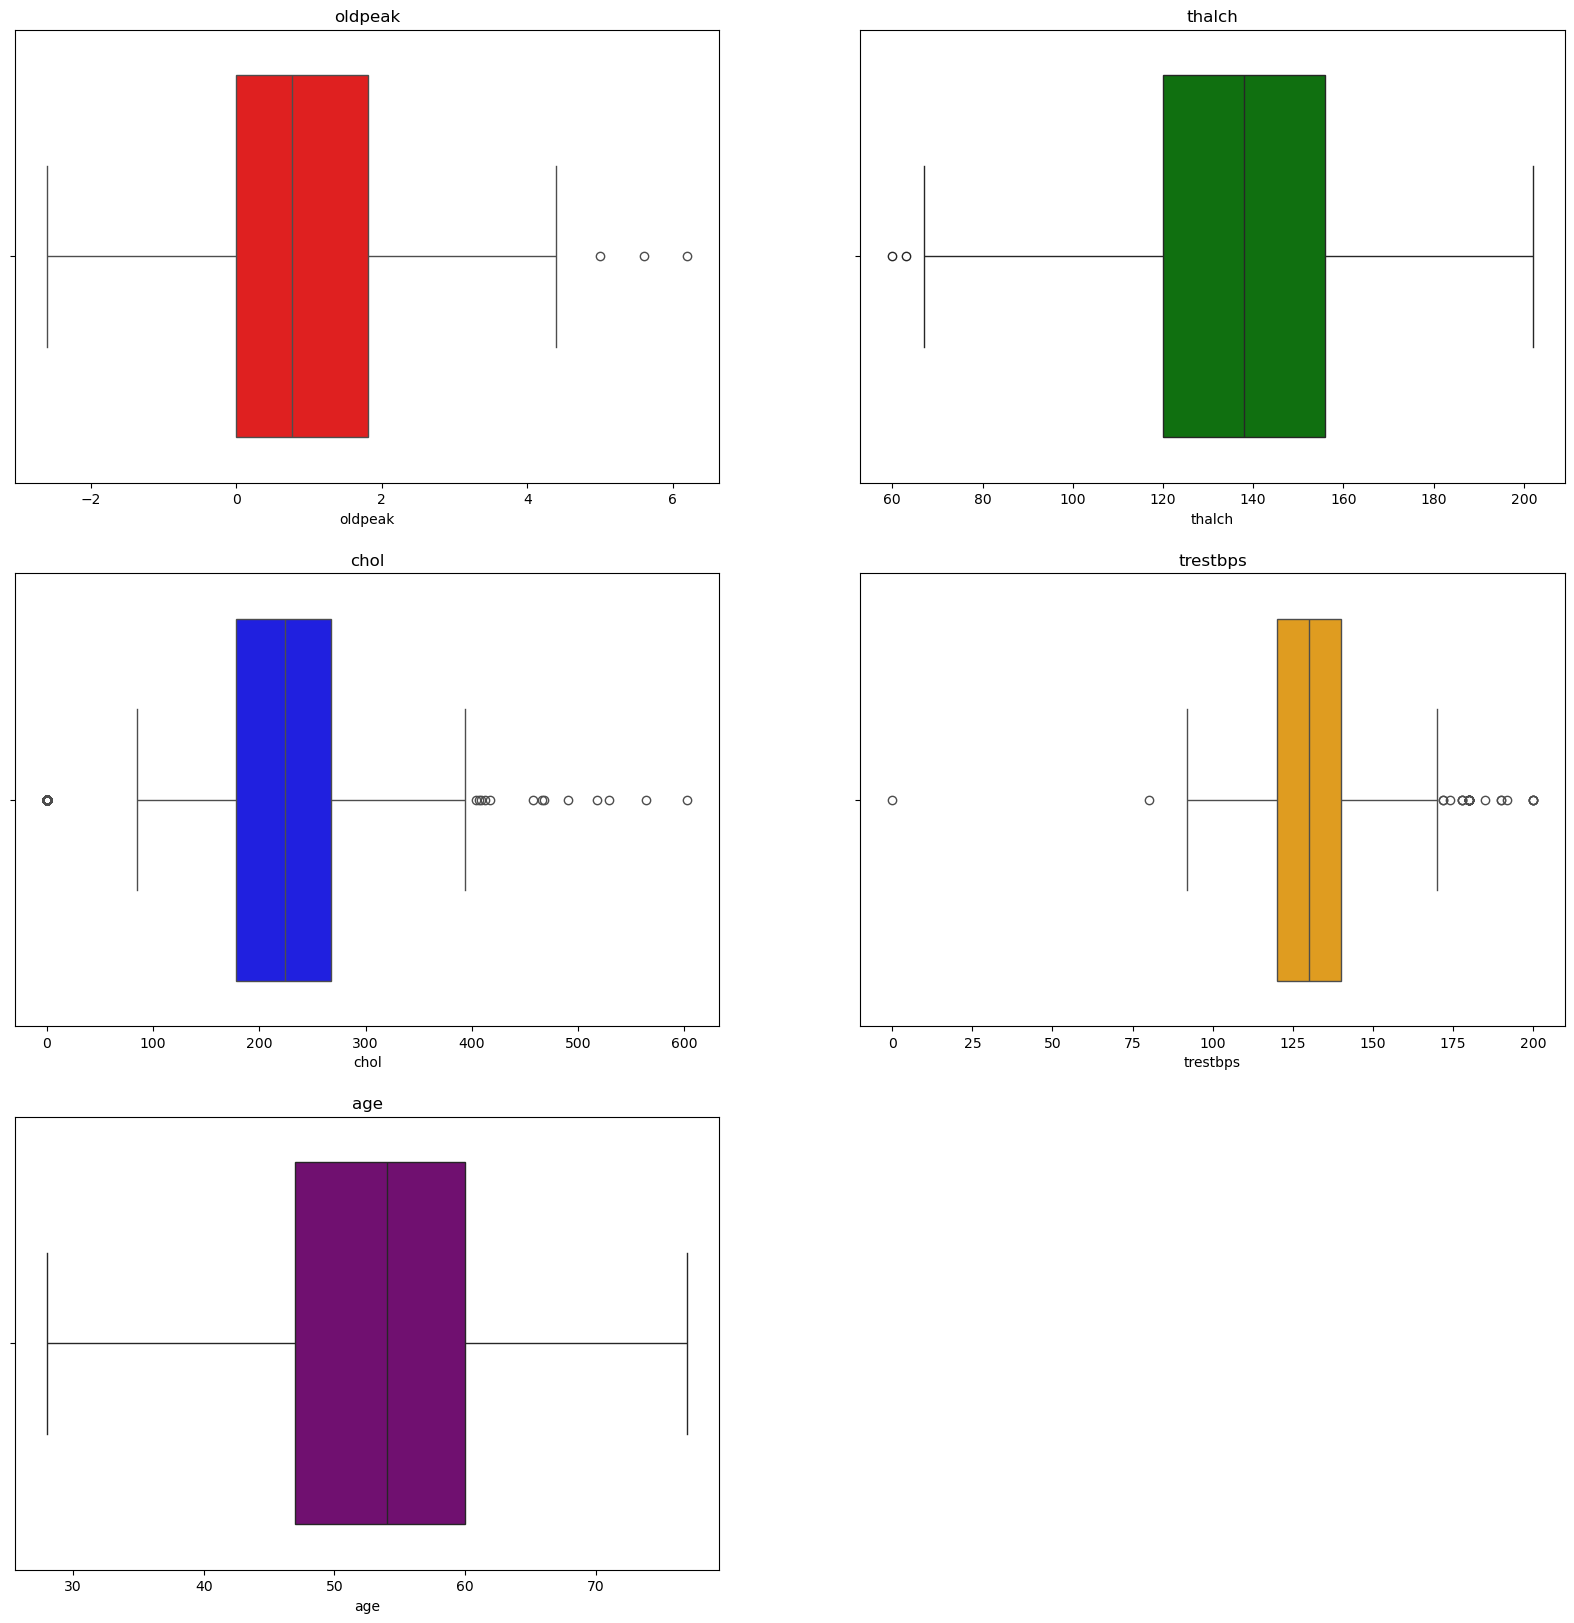

In [69]:
# create box plots for all numeric columns using for loop and subplot
plt.figure(figsize=(20, 20))

colors = ['red', 'green', 'blue', 'orange', 'purple']

for i, col in enumerate(numeric_cols):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x=df[col], color=colors[i])
    plt.title(col)
plt.show()

In [70]:
# make box plots of all the numeric columns using for loop and plotly
fig = px.box(data_frame=df, y='age')
fig.show()

fig = px.box(data_frame=df, y='trestbps')
fig.show()

fig = px.box(data_frame=df, y='chol')
fig.show()

fig = px.box(data_frame=df, y='thalch')
fig.show()

fig = px.box(data_frame=df, y='oldpeak')
fig.show()

In [71]:
# print the row from df where trestbps value is 0
df[df['trestbps'] == 0]
# remove this row from data
df = df[df['trestbps'] != 0]

In [86]:
df.head()
df.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

## It is not possible for a human to have zero cholestrol so it is an outlier
so we will remove the rows with zero cholestrol

In [93]:
# print the row from df where chol value is 0
df[df['chol'] == 0]
df = df[df['chol'] != 0]

### <span style="color:yellow; font-size:60px;font-weight:700">Machine learning</span>

In [89]:
df['num'].value_counts()

num
0    391
1    203
3     69
2     63
4     22
Name: count, dtype: int64

The target column is `num` which is the predicted attribute (presence of heart disease). We will use this column to predict whether a given patient has heart disease based on the provided attributes.
The unique values in the target column are: [0, 1, 2, 3, 4] which represent the presence of heart disease.
* `0 = absence of heart disease`
* `1 = mild heart disease`
* `2 = moderate heart disease`
* `3 = severe heart disease`
* `4 = critical heart disease`

We need to do multi-class classification to predict the presence of heart disease in a patient.

In [90]:
# split the data into X and y
X = df.drop('num', axis=1)
y = df['num']

# encode X data using separate label encoder for all categorical columns and save it for inverse transform
# Task: Separate Encoder for all cat and object columns and inverse transform at the end

label_encoder = LabelEncoder()

for col in X.columns:
    if X[col].dtype == 'object' or X[col].dtype == 'category':
        X[col] = label_encoder.fit_transform(X[col])
    else:
        pass

# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### These are the machine learning models we will use to predict the presence of heart disease in a patient:
1. Logistic Regression
2. K-Nearest Neighbors
3. naive Bayes
4. Support Vector Machine
5. Decision Tree
6. Random Forest
7. xgboost
8. lightgbm
9. Naive Bayes


In [91]:
# import all models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
# from lightgbm import LGBMClassifier

# impot pipeline
from sklearn.pipeline import Pipeline

# import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [96]:
# Create a list of models to evaluate
models = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('Support Vector Machine', SVC(random_state=42)),
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Ada Boost', AdaBoostClassifier(random_state=42)),
    # ('XG Boost', XGBClassifier(random_state=42)),
    ('Naive Bayes', GaussianNB())
]

best_model = None
best_accuracy = 0.0

# Iterate over the models and evaluate their performance
for name, model in models:
    # Create a pipeline for each model
    pipeline = Pipeline([
        # ('imputer', SimpleImputer(strategy='most_frequent')),
        # ('encoder', OneHotEncoder(handle_unknown='ignore')),
        ('model', model)
    ])
    
    # Perform cross-validation
    scores = cross_val_score(pipeline, X_train, y_train, cv=5)
    
    # Calculate mean accuracy
    mean_accuracy = scores.mean()
    
    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)
    
    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    
    # Print the performance metrics
    print("Model:", name)
    print("Cross-validation Accuracy:", mean_accuracy)
    print("Test Accuracy:", accuracy)
    print()
    
    # Check if the current model has the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline

# Retrieve the best model
print("Best Model:", best_model)

# save the best model
import pickle
pickle.dump(best_model, open('heart_disease_model.pkl', 'wb'))

Model: Random Forest
Cross-validation Accuracy: 0.7113186813186813
Test Accuracy: 0.7111111111111111

Model: Gradient Boosting
Cross-validation Accuracy: 0.7017765567765568
Test Accuracy: 0.6977777777777778

Model: Support Vector Machine
Cross-validation Accuracy: 0.6348534798534798
Test Accuracy: 0.6

Model: Logistic Regression
Cross-validation Accuracy: 0.587051282051282
Test Accuracy: 0.5555555555555556

Model: K-Nearest Neighbors
Cross-validation Accuracy: 0.6272710622710622
Test Accuracy: 0.64

Model: Decision Tree
Cross-validation Accuracy: 0.6864285714285714
Test Accuracy: 0.6444444444444445

Model: Ada Boost
Cross-validation Accuracy: 0.6865201465201466
Test Accuracy: 0.6533333333333333

Model: Naive Bayes
Cross-validation Accuracy: 0.6311904761904762
Test Accuracy: 0.6177777777777778

Best Model: Pipeline(steps=[('model', RandomForestClassifier(random_state=42))])


### Output

1. People get heart disease after 28 years old
2. Most people gets it at the age of 53-54 years
3. Most of males and females get diagonse with heart disease at the age of 54-55
4. Male percentage in the dataset: 78.91%
5. Female percentage in the dataset: 21.09%
6. Difference in percentage: 274.23%
7. We have highest number of people from Cleveland which are 304 and loweset from Switzerland which are 123
   1. The highest number of females in this dataset are from Cleveland which are 97 and loweset in VA Long Beach which are 6
   2. The highest number of males in this dataset are from Cleveland which are 212 and loweset in VA Long Beach which are 113
8.  Mean Age by Dataset:
    - **Cleveland**: 54.35 years
    - **Hungary**: 47.89 years
    - **Switzerland**: 55.32 years
    - **VA Long Beach**: 59.35 years
  
9.  Median Age by Dataset:
    - **Cleveland**: 55.5 years
    - **Hungary**: 49.0 years
    - **Switzerland**: 56.0 years
    - **VA Long Beach**: 60.0 years

10. Mode Age by Dataset:
    - **Cleveland**: 58 years
    - **Hungary**: 54 years
    - **Switzerland**: 61 years
    - **VA Long Beach**: 62 years
11. We separated the columns 
    - Categorical
    - Numeric
    - Bool
12. We made function for imputatation so we dont have write it over and over again
    - Inside the function we used ML model called RandomForestRegressor inside the Iterative Imputer which iteratively removes null values
13. We did outlier deduction
    - We removed the values that are zero in trestbps column as it is impossible for someone to have zero rest blood pressure
